<a href="https://colab.research.google.com/github/adamrahmaan17/Lampiran-TA/blob/main/Klasifikasi_kualitas_air_Tambak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Klasifikasi kondisi tambak udang Vaname dengan menggunakan algoritma C4.5 (decision tree) studi kasus tambak udang Bratasena**



Urutan proses untuk pengerjaan:
1. Pengumpulan Data
2. Data Preprocessing
3. Penerapan Algoritma C4.5
4. Evaluasi Model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd 
data1 = pd.read_csv('/content/drive/MyDrive/Datatambak.csv')

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         630 non-null    int64  
 1   pH         630 non-null    float64
 2   DO (Mg/L)  630 non-null    float64
 3   TDS        630 non-null    int64  
 4   NO3        630 non-null    float64
 5   suhu       630 non-null    float64
 6   Kategori   630 non-null    object 
 7   Date       630 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 39.5+ KB


In [ ]:
print(data1)

      No   pH  DO (Mg/L)  TDS  NO3  suhu  Kategori       Date
0      1  6.0        3.0  300  3.6   29.5      Bad  2/10/2009
1      2  7.0        2.9  450  3.6   31.0      Bad  2/10/2009
2      3  6.5        3.5  320  3.4   30.0     Poor  2/11/2009
3      4  6.8        3.8  400  3.0   31.0     Poor  2/11/2009
4      5  8.0        3.6  700  3.1   32.0     Poor  2/12/2009
..   ...  ...        ...  ...  ...    ...      ...        ...
625  626  6.7        3.7  942  2.4   31.0      Bad   1/7/2010
626  627  9.0        3.7  544  3.4   30.0      Bad   1/8/2010
627  628  7.6        2.3  986  2.7   30.0     Good   1/8/2010
628  629  7.9        2.3  353  3.9   31.0     Good   1/9/2010
629  630  8.0        5.7  584  2.4   29.0     Good   1/9/2010

[630 rows x 8 columns]


In [ ]:
data1.to_excel ("timeseries_data.xlsx")

Penghapusan atribut/kolom pada dataset yang tidak diperlukan untuk penelitian

In [ ]:
# Memuat dataframe dari file Excel di Google Drive
dataframe = pd.read_excel("/content/drive/MyDrive/timeseries_data.xlsx")

In [ ]:
dataframe

,Unnamed: 0,No,pH,DO (Mg/L),TDS,NO3,suhu,Kategori,Date
0,0,1,6.0,3.0,300,3.6,29.5,Bad,2/10/2009
1,1,2,7.0,2.9,450,3.6,31.0,Bad,2/10/2009
2,2,3,6.5,3.5,320,3.4,30.0,Poor,2/11/2009
3,3,4,6.8,3.8,400,3.0,31.0,Poor,2/11/2009
4,4,5,8.0,3.6,700,3.1,32.0,Poor,2/12/2009
...,...,...,...,...,...,...,...,...,...
625,625,626,6.7,3.7,942,2.4,31.0,Bad,1/7/2010
626,626,627,9.0,3.7,544,3.4,30.0,Bad,1/8/2010
627,627,628,7.6,2.3,986,2.7,30.0,Good,1/8/2010
628,628,629,7.9,2.3,353,3.9,31.0,Good,1/9/2010


kemudian penulis akan melakukan penghapusan kolom yang tidak diperlukan seperti No, DO NO3 dan date

In [ ]:
dataframe = dataframe.drop(['Unnamed: 0', 'No', 'DO (Mg/L)', 'NO3'], axis=1)
dataframe

,pH,TDS,suhu,Kategori,Date
0,6.0,300,29.5,Bad,2/10/2009
1,7.0,450,31.0,Bad,2/10/2009
2,6.5,320,30.0,Poor,2/11/2009
3,6.8,400,31.0,Poor,2/11/2009
4,8.0,700,32.0,Poor,2/12/2009
...,...,...,...,...,...
625,6.7,942,31.0,Bad,1/7/2010
626,9.0,544,30.0,Bad,1/8/2010
627,7.6,986,30.0,Good,1/8/2010
628,7.9,353,31.0,Good,1/9/2010


In [ ]:
dataframe

,pH,TDS,suhu,Kategori,Date
0,6.0,300,29.5,Bad,2/10/2009
1,7.0,450,31.0,Bad,2/10/2009
2,6.5,320,30.0,Poor,2/11/2009
3,6.8,400,31.0,Poor,2/11/2009
4,8.0,700,32.0,Poor,2/12/2009
...,...,...,...,...,...
625,6.7,942,31.0,Bad,1/7/2010
626,9.0,544,30.0,Bad,1/8/2010
627,7.6,986,30.0,Good,1/8/2010
628,7.9,353,31.0,Good,1/9/2010


In [ ]:
dataframe = dataframe.drop(['Date'], axis=1)

In [ ]:
dataframe

,pH,TDS,suhu,Kategori
0,6.0,300,29.5,Bad
1,7.0,450,31.0,Bad
2,6.5,320,30.0,Poor
3,6.8,400,31.0,Poor
4,8.0,700,32.0,Poor
...,...,...,...,...
625,6.7,942,31.0,Bad
626,9.0,544,30.0,Bad
627,7.6,986,30.0,Good
628,7.9,353,31.0,Good


Kemudian dilakukan pengecekan missing values pada data

In [ ]:
# mengecek missing value untuk setiap atribut/kolom
print(dataframe.isna().sum())

# menghitung jumlah dari missing value
print(dataframe.isna().sum().sum())

pH          0
TDS         0
suhu        0
Kategori    0
dtype: int64
0


Jumlah data terisi pada kolom 'categori':
 Good        200
Bad         188
Poor        185
Very Bad     57
Name: Kategori, dtype: int64

 Grafik dari jumlah 'categori': 



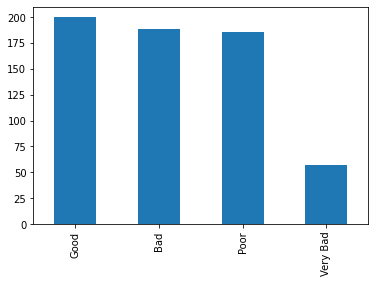

In [ ]:
total_categori = dataframe['Kategori'].value_counts()
print("Jumlah data terisi pada kolom 'categori':\n",total_categori)

import matplotlib.pyplot as plt
print("\n Grafik dari jumlah 'categori': \n")
total_categori.plot.bar()

missing values sudah di cek dan sudah di bersihkan 

In [ ]:
dataframe

,pH,TDS,suhu,Kategori
0,6.0,300,29.5,Bad
1,7.0,450,31.0,Bad
2,6.5,320,30.0,Poor
3,6.8,400,31.0,Poor
4,8.0,700,32.0,Poor
...,...,...,...,...
625,6.7,942,31.0,Bad
626,9.0,544,30.0,Bad
627,7.6,986,30.0,Good
628,7.9,353,31.0,Good


In [ ]:
dataframe.to_excel("dataframe.xlsx")

# Data Rescalling

Setelah itu, agar angka pada tiap atribut/kolom masukan memiliki rentang nilai yang sama, maka perlu dilakukan penskalaan ulang (data rescaling) sehingga tidak terjadi bias pada model ketika dataset digunakan sebagai data training dan data testing. Berikut ini penulis melakukan data rescaling menggunakan MinMaxScaler yang akan membuat rentang nilai pada kolom yang diplih menjadi antara 0 hingga 1.



In [ ]:
# panggil dataframe terbaru
dataframe_new = pd.read_excel("/content/drive/MyDrive/dataframe.xlsx")

from sklearn.preprocessing import MinMaxScaler

# mendefinisikan fungsi MinMaxScaler sebagai sebuah variabel
scaler = MinMaxScaler()

# buat daftar setiap atribut/kolom yang perlu dilakukan penskalaan ulang
scaling_column = ['pH', 'TDS', 'suhu ']

# terapkan fungsi fit_transform kepada atribut/kolom yang sudah dipilih
dataframe_new[scaling_column] = scaler.fit_transform(dataframe_new[scaling_column])

# mengecek nilai min dan max
print(dataframe_new[scaling_column].describe().T[['min', 'max']])

       min  max
pH     0.0  1.0
TDS    0.0  1.0
suhu   0.0  1.0


In [ ]:
dataframe_new

,Unnamed: 0,pH,TDS,suhu,Kategori
0,0,0.000000,0.000000,0.125,Bad
1,1,0.333333,0.215208,0.500,Bad
2,2,0.166667,0.028694,0.250,Poor
3,3,0.266667,0.143472,0.500,Poor
4,4,0.666667,0.573888,0.750,Poor
...,...,...,...,...,...
625,625,0.233333,0.921090,0.500,Bad
626,626,1.000000,0.350072,0.250,Bad
627,627,0.533333,0.984218,0.250,Good
628,628,0.633333,0.076040,0.500,Good


# Data Label Encoding
Setelah itu, dalam penggunaan library Scikit-Learn, dataset perlu dipisahkan ke dalam Features dan Label/Target. Variabel Feature menjadi terdiri dari variabel yang dideklarasikan sebagai X dan [categori] adalah variabel target yang dideklarasikan sebagai y.

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
dataframe_new['Kategori'] = LE.fit_transform(dataframe_new['Kategori'])

X = dataframe_new.drop(['Kategori'], axis = 1)
y = dataframe_new['Kategori']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (630, 4)
Shape of y: (630,)


In [ ]:
dataframe_new

,Unnamed: 0,pH,TDS,suhu,Kategori
0,0,0.000000,0.000000,0.125,0
1,1,0.333333,0.215208,0.500,0
2,2,0.166667,0.028694,0.250,2
3,3,0.266667,0.143472,0.500,2
4,4,0.666667,0.573888,0.750,2
...,...,...,...,...,...
625,625,0.233333,0.921090,0.500,0
626,626,1.000000,0.350072,0.250,0
627,627,0.533333,0.984218,0.250,1
628,628,0.633333,0.076040,0.500,1


Kemudian, dataset tersebut, yang sudah selesai dibersihkan dengan beberapa tahapan, diekspor ke dalam file Excel untuk diproses ke tahapan selanjutnya.

In [ ]:
dataframe_new.to_excel("dataframe_afterscaling.xlsx")

#Data Transformation

In [ ]:
# panggil dataframe terbaru
dataframe_new_2 = pd.read_excel("/content/drive/MyDrive/dataframe_afterscaling.xlsx")
dataframe_new_2 = dataframe_new_2.drop(['Unnamed: 0'], axis=1)


In [ ]:
dataframe_new_2 = dataframe_new_2.drop(['Unnamed: 0.1'], axis=1)
dataframe_new_2

,pH,TDS,suhu,Kategori
0,0.000000,0.000000,0.125,0
1,0.333333,0.215208,0.500,0
2,0.166667,0.028694,0.250,2
3,0.266667,0.143472,0.500,2
4,0.666667,0.573888,0.750,2
...,...,...,...,...
625,0.233333,0.921090,0.500,0
626,1.000000,0.350072,0.250,0
627,0.533333,0.984218,0.250,1
628,0.633333,0.076040,0.500,1


In [ ]:
dataframe_new_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pH        630 non-null    float64
 1   TDS       630 non-null    float64
 2   suhu      630 non-null    float64
 3   Kategori  630 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 19.8 KB


In [ ]:
dataframe_new_2.to_excel("dataframe_aftertrans.xlsx")

# **Penerapan Algoritma C4.5**


Dari total 630 dataset, penulis menggunakan 420 dataset awal sebagai data training dan sisanya sebagai data testing. Dengan begitu, ukuran pembagian dari data training adalah (420/630)*1 = 0.666 dan data testing adalah 1- 0.666= 0.334


In [ ]:
import pandas as pd
tambak_new = pd.read_excel("/content/drive/MyDrive/dataframe_aftertrans.xlsx")

In [ ]:
# melihat informasi dari dataset
tambak_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  630 non-null    int64  
 1   pH          630 non-null    float64
 2   TDS         630 non-null    float64
 3   suhu        630 non-null    float64
 4   Kategori    630 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 24.7 KB


In [ ]:
tambak_new = tambak_new.drop(['Unnamed: 0'], axis=1)

In [ ]:
tambak_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pH        630 non-null    float64
 1   TDS       630 non-null    float64
 2   suhu      630 non-null    float64
 3   Kategori  630 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 19.8 KB


# Model Developing

In [ ]:
from sklearn.model_selection import train_test_split

# mendefinisikan 2 variabel yang digunakan untuk splitting dataset
X_tambak = tambak_new.iloc[:, :-1]
y_tambak = tambak_new['Kategori']

# penggunaan fungsi train_test_split dalam splitting dataset
X_train_tambak, X_test_tambak, y_train_tambak, y_test_tambak = train_test_split(X_tambak, y_tambak, test_size=0.2, shuffle=False)

In [ ]:

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="entropy", max_depth = 7, random_state=42)
model.fit(X_train_tambak, y_train_tambak)
list_of_features = ['pH','TDS','suhu ']
list_of_classes = ['Bad','Good','Poor','Very Bad']

[Text(0.47400442477876104, 0.9375, 'pH <= 0.25\nentropy = 1.87\nsamples = 504\nvalue = [151, 150, 160, 43]\nclass = Poor'),
 Text(0.19469026548672566, 0.8125, 'TDS <= 0.508\nentropy = 1.013\nsamples = 112\nvalue = [86, 0, 12, 14]\nclass = Bad'),
 Text(0.12389380530973451, 0.6875, 'pH <= 0.117\nentropy = 0.548\nsamples = 79\nvalue = [69, 0, 10, 0]\nclass = Bad'),
 Text(0.08849557522123894, 0.5625, 'TDS <= 0.033\nentropy = 0.201\nsamples = 64\nvalue = [62, 0, 2, 0]\nclass = Bad'),
 Text(0.07079646017699115, 0.4375, 'TDS <= 0.02\nentropy = 0.619\nsamples = 13\nvalue = [11, 0, 2, 0]\nclass = Bad'),
 Text(0.05309734513274336, 0.3125, 'TDS <= 0.006\nentropy = 0.414\nsamples = 12\nvalue = [11, 0, 1, 0]\nclass = Bad'),
 Text(0.035398230088495575, 0.1875, 'suhu  <= 0.188\nentropy = 0.722\nsamples = 5\nvalue = [4, 0, 1, 0]\nclass = Bad'),
 Text(0.017699115044247787, 0.0625, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0, 0, 0]\nclass = Bad'),
 Text(0.05309734513274336, 0.0625, 'entropy = 0.0\nsample

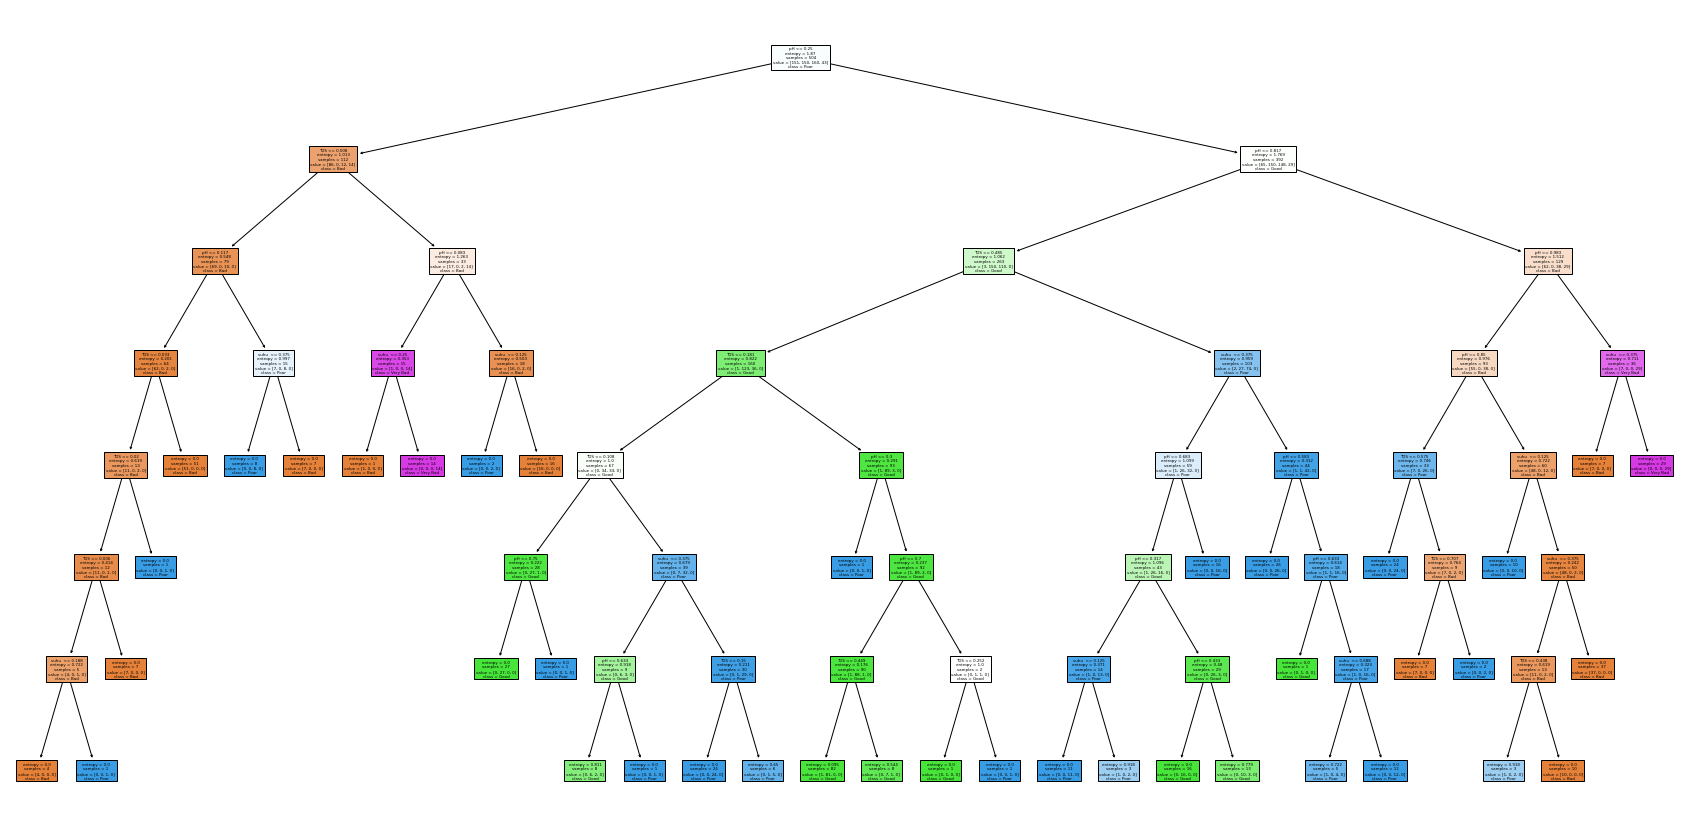

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text

plt.figure(figsize=(30, 15))
plot_tree(model, feature_names=list_of_features, class_names=list_of_classes, filled=True)

In [ ]:

print(export_text(model, feature_names=list_of_features, show_weights=True))

|--- pH <= 0.25
|   |--- TDS <= 0.51
|   |   |--- pH <= 0.12
|   |   |   |--- TDS <= 0.03
|   |   |   |   |--- TDS <= 0.02
|   |   |   |   |   |--- TDS <= 0.01
|   |   |   |   |   |   |--- suhu  <= 0.19
|   |   |   |   |   |   |   |--- weights: [4.00, 0.00, 0.00, 0.00] class: 0
|   |   |   |   |   |   |--- suhu  >  0.19
|   |   |   |   |   |   |   |--- weights: [0.00, 0.00, 1.00, 0.00] class: 2
|   |   |   |   |   |--- TDS >  0.01
|   |   |   |   |   |   |--- weights: [7.00, 0.00, 0.00, 0.00] class: 0
|   |   |   |   |--- TDS >  0.02
|   |   |   |   |   |--- weights: [0.00, 0.00, 1.00, 0.00] class: 2
|   |   |   |--- TDS >  0.03
|   |   |   |   |--- weights: [51.00, 0.00, 0.00, 0.00] class: 0
|   |   |--- pH >  0.12
|   |   |   |--- suhu  <= 0.38
|   |   |   |   |--- weights: [0.00, 0.00, 8.00, 0.00] class: 2
|   |   |   |--- suhu  >  0.38
|   |   |   |   |--- weights: [7.00, 0.00, 0.00, 0.00] class: 0
|   |--- TDS >  0.51
|   |   |--- pH <= 0.08
|   |   |   |--- suhu  <= 0.25
|   |   

# **Data Balancing**

[PENTING] Setelah itu, penulis melakukan balancing data agar data yang dipakai bisa seimbang dan model yang dibuat diusahakan untuk tidak overfitting kepada satu kategori saja.

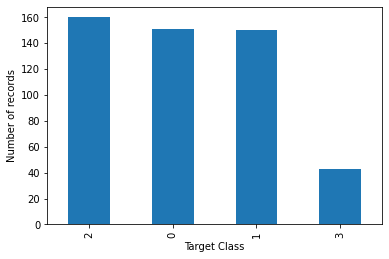

In [ ]:
# data sebelum di-balancing

import matplotlib.pyplot as plt
count = y_train_tambak.value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()

In [ ]:
from collections import Counter
print('Original dataset shape %s' % Counter(y_train_tambak))

Original dataset shape Counter({2: 160, 0: 151, 1: 150, 3: 43})


**Over sampilng**

In [ ]:
from imblearn.over_sampling import SMOTE
# mendefinisikan 2 variabel yang digunakan untuk splitting dataset
X_tambak_2 = tambak_new.iloc[:, :-1]
y_tambak_2 = tambak_new['Kategori']

# penggunaan fungsi train_test_split dalam splitting dataset
X_train_tambak_2, X_test_tambak_2, y_train_tambak_2, y_test_tambak_2 = train_test_split(X_tambak_2, y_tambak_2, test_size=0.2, shuffle=False)

In [ ]:
oversample = SMOTE(sampling_strategy="auto", random_state=42)
X_train_tambak_2, y_train_tambak_2 = oversample.fit_resample(X_train_tambak_2, y_train_tambak_2)

In [ ]:
from collections import Counter
print('Original dataset shape %s' % Counter(y_train_tambak))
print('Resampled dataset shape %s' % Counter(y_train_tambak_2))

Original dataset shape Counter({2: 160, 0: 151, 1: 150, 3: 43})
Resampled dataset shape Counter({0: 160, 2: 160, 1: 160, 3: 160})


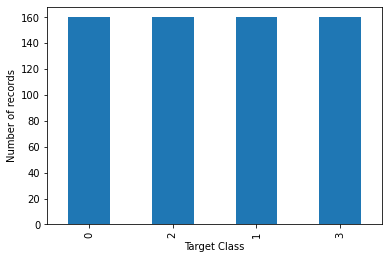

In [ ]:
#setelah dilakukan oversampling

import matplotlib.pyplot as plt
count = y_train_tambak_2.value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()

**Pembuatan model kedua**

In [ ]:
model2 = DecisionTreeClassifier(criterion="entropy", max_depth = 7, random_state=42)
model2.fit(X_train_tambak_2, y_train_tambak_2)


DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=42)

In [ ]:
# mendefinisikan 2 variabel yang digunakan untuk splitting dataset
X_tambak_rus = tambak_new.iloc[:, :-1]
y_tambak_rus = tambak_new['Kategori']

# penggunaan fungsi train_test_split dalam splitting dataset
X_train_tambak_rus, X_test_tambak_rus, y_train_tambak_rus, y_test_tambak_rus = train_test_split(X_tambak_rus, y_tambak_rus, test_size=0.2, shuffle=False)

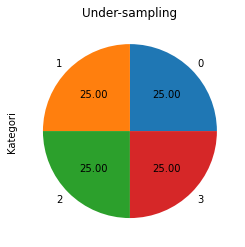

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy="auto")
X_train_tambak_rus, y_train_tambak_rus = rus.fit_resample(X_train_tambak_rus, y_train_tambak_rus)

ax = y_train_tambak_rus.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [ ]:
print('Original dataset shape %s' % Counter(y_train_tambak))
print('Resampled dataset shape %s' % Counter(y_train_tambak_rus))

Original dataset shape Counter({2: 160, 0: 151, 1: 150, 3: 43})
Resampled dataset shape Counter({0: 43, 1: 43, 2: 43, 3: 43})


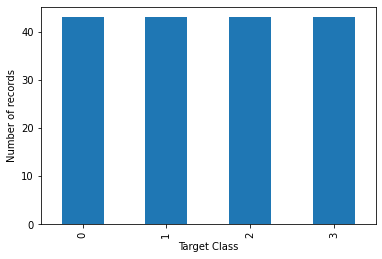

In [ ]:
count2 = y_train_tambak_rus.value_counts()
count2.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()

# **Evaluasi Model**

Ada dua tahapan dalam evaluasi model, yaitu dengan menggunakan confusion matrix serta laporan hasil klasifikasi.

# **Confusion Matrix**
Pada tahap ini, penulis melakukan evaluasi model dengan Confusion Matrix.


In [ ]:
y_pred_tambak = model.predict(X_test_tambak)

In [ ]:
from sklearn.metrics import confusion_matrix
cm_tambak = confusion_matrix(y_test_tambak, y_pred_tambak)
print(cm_tambak)

[[37  0  0  0]
 [ 0 50  0  0]
 [ 0  0 25  0]
 [ 0  0  0 14]]


In [ ]:
cm_tambak_plot = pd.DataFrame(cm_tambak,
                     index = ['Bad','Good','Poor','Very Bad'], 
                     columns = ['Bad','Good','Poor','Very Bad'],)

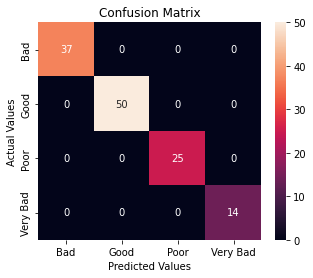

In [ ]:

#Plotting the confusion matrix
import seaborn as sns

plt.figure(figsize=(5,4))
sns.heatmap(cm_tambak_plot, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
y_pred_tambak_2 = model2.predict(X_test_tambak_2)

In [ ]:
cm_tambak_2 = confusion_matrix(y_test_tambak_2, y_pred_tambak_2)
print(cm_tambak_2)

[[37  0  0  0]
 [ 0 50  0  0]
 [ 0  0 25  0]
 [ 0  0  0 14]]


In [ ]:
cm_tambak_plot_2 = pd.DataFrame(cm_tambak_2,
                     index = ['Bad','Good','Poor','Very Bad'], 
                     columns = ['Bad','Good','Poor','Very Bad'],)

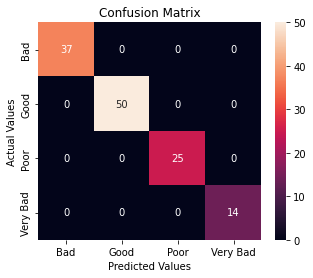

In [ ]:
#Plotting the confusion matrix

plt.figure(figsize=(5,4))
sns.heatmap(cm_tambak_plot_2, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# **Laporan Hasil Klasifikasi**

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred_tambak = model.predict(X_test_tambak)
print(classification_report(y_test_tambak, y_pred_tambak))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        14

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [ ]:
y_pred_tambak_2 = model2.predict(X_test_tambak_2)
print(classification_report(y_test_tambak_2, y_pred_tambak_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        14

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

